In [29]:
!pip install imbalanced-learn
!pip install xgboost

In [13]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
!pip install python-dotenv
import numpy as np

In [5]:
# CHARGEMENT DU FICHIER

# Load the data into a DataFrame
file_path = '/Users/ikram/Downloads/HPS_Phase4-1Cycle05_PUF_CSV/hps_04_01_05_puf.csv'
DF_HPS = pd.read_csv(file_path)

# Display the shape and first few rows of the DataFrame
print(f"Shape of the DataFrame: {DF_HPS.shape}")
print(DF_HPS .head())


Shape of the DataFrame: (72162, 181)
        SCRAM  CYCLE  EST_ST  EST_MSA  REGION      HWEIGHT       PWEIGHT  \
0  P050000001      5      17      NaN       3  5828.494764  10716.298092   
1  P050000002      5      22      NaN       2  1116.393012   1042.535706   
2  P050000003      5      51  47900.0       2   869.086781    838.400923   
3  P050000004      5      45      NaN       2  1700.723916   1572.777363   
4  P050000005      5      48  26420.0       2  1151.889605   3234.827629   

   TBIRTH_YEAR  ABIRTH_YEAR  RHISPANIC  ...  ARTEXHIBIT  CREATEART  \
0         1998            2          1  ...           2          2   
1         1962            2          1  ...           1          2   
2         1951            2          1  ...           2          2   
3         1975            2          1  ...           2          2   
4         1950            2          2  ...         -88        -88   

   LIVENTERTAINMENT  MEDICAID  MEDICAID_NO  MOVIES  PARTINARTS  UI_APPLYRV  \
0      

In [ ]:










# ----------------------------------------------------------DATA CLEANING-------------------------------------------------------------------










In [19]:
# ANALYSE DES VALEURS VIDES PAR COLONNE

# Chemin vers votre fichier Excel contenant le dictionnaire de données
dictionary_path = '/Users/ikram/Downloads/HPS_Phase4-1Cycle05_PUF_CSV/HPS_data.dictionary_Phase 4.1 Cycle05_CSV.xlsx'

# Chargement du fichier CSV principal
DF_HPS = pd.read_csv(file_path)

# Remplacer les valeurs spéciales par NaN
DF_HPS.replace([-88, -99], np.nan, inplace=True)

# Calcul du nombre de valeurs manquantes et du pourcentage pour chaque colonne
missing_data = DF_HPS.isna().sum()
missing_percentage = (missing_data / len(DF_HPS)) * 100
missing_df = pd.DataFrame({'Variable': DF_HPS.columns, 'Null Count': missing_data, 'Null Percentage': missing_percentage})

# Chargement du dictionnaire de données à partir du fichier Excel
df_dict = pd.read_excel(dictionary_path, sheet_name='Data Dictionary2')

# Vérification des colonnes du dictionnaire de données
print(df_dict.columns)

# Fusion des dataframes basés sur la colonne 'Variable'
merged_df = pd.merge(missing_df, df_dict[['Variable', 'Description.1']], left_on='Variable', right_on='Variable', how='left')

# Renommer la colonne pour plus de clarté
merged_df.rename(columns={'Description.1': 'Description'}, inplace=True)

# Affichage du dataframe résultant
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(merged_df)

# Sauvegarde du résultat dans un fichier Excel
output_path = '/Users/ikram/Documents/FinaleProject/output_with_descriptions_2.xlsx'
merged_df.to_excel(output_path, index=False)

Index(['Instrument Q #', 'Variable', 'Description', 'Description.1',
       'Traduction', 'Catégorie', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')
               Variable  Null Count  Null Percentage  \
0                 SCRAM           0         0.000000   
1                 CYCLE           0         0.000000   
2                EST_ST           0         0.000000   
3               EST_MSA       51563        71.454505   
4                REGION           0         0.000000   
5               HWEIGHT           0         0.000000   
6               PWEIGHT           0         0.000000   
7           TBIRTH_YEAR           0         0.000000   
8           ABIRTH_YEAR           0         0.000000   
9             RHISPANIC           0         0.000000   
10            AHISPANIC           0         0.000000   
11                RRACE           0         0.000000   
12                ARACE           0         0.000000   
13                EEDUC           0         0.000000   
14    

In [52]:
# SELECTION DES COLONNES

# Liste des colonnes à conserver
colonnes_selectionnees = [
    'SEXUAL_ORIENTATION', 'MS', 'TBIRTH_YEAR', 'EEDUC', 'EGENID_BIRTH', 
    'THHLD_NUMPER', 'THHLD_NUMKID', 'INCOME', 'CURFOODSUF', 'EXPNS_DIF', 
    'TENURE', 'HSE_TEMP', 'ENERGY', 'SUPPORT1EXP', 'SUPPORT3', 'SUPPORT4_RV', 
    'SUPPORT2', 'SUPPORT1', 'SOCIAL1', 'SOCIAL2', 'ANYWORK', 'WRKLOSSRV', 
    'HEARING', 'SELFCARE', 'REMEMBERING', 'MOBILITY', 'UNDERSTAND', 'SEEING', 
    'DOWN', 'WORRY', 'INTEREST', 'ANXIOUS', 'PARTINARTS', 'CREATEART', 
    'ARTEXHIBIT', 'MOVIES', 'LIVENTERTAINMENT'
]

# Création d'un nouveau dataframe avec les colonnes sélectionnées
DF_HPS_VF = DF_HPS[colonnes_selectionnees]

# Affichage du nombre de lignes et de colonnes
print(f"Nombre de lignes: {DF_HPS_VF.shape[0]}")
print(f"Nombre de colonnes: {DF_HPS_VF.shape[1]}")

# Affichage des premières lignes du nouveau dataframe
print(DF_HPS_VF.head())


Nombre de lignes: 72162
Nombre de colonnes: 37
  SEXUAL_ORIENTATION   MS  TBIRTH_YEAR  EEDUC  EGENID_BIRTH  THHLD_NUMPER  \
0                2.0  1.0         1998      7             1             2   
1                2.0  3.0         1962      6             2             1   
2                2.0  3.0         1951      5             2             1   
3                2.0  3.0         1975      5             2             2   
4                2.0  3.0         1950      6             2             5   

   THHLD_NUMKID INCOME CURFOODSUF EXPNS_DIF TENURE HSE_TEMP ENERGY  \
0             0    6.0        1.0       1.0    2.0      4.0    4.0   
1             0    6.0        2.0       1.0    2.0      4.0    4.0   
2             0    3.0        1.0       1.0    2.0      4.0    4.0   
3             1    3.0        2.0       3.0    1.0      2.0    3.0   
4             2    NaN        NaN       NaN    NaN      NaN    NaN   

  SUPPORT1EXP SUPPORT3 SUPPORT4_RV SUPPORT2 SUPPORT1 SOCIAL1 SOCIAL2 

In [11]:
# ANALYSE DES VALEURS VIDES

# Remplacement des valeurs spéciales par NaN en créant une copie du DataFrame
DF_HPS_VF = DF_HPS_VF.copy()
DF_HPS_VF.replace([-99, -88], pd.NA, inplace=True)

# Affichage des premières lignes pour vérifier les remplacements
print(DF_HPS_VF.head())

# Affichage du nombre de valeurs manquantes par colonne
missing_data = DF_HPS_VF.isna().sum()
missing_percentage = (missing_data / len(DF_HPS_VF)) * 100
missing_df = pd.DataFrame({'Variable': DF_HPS_VF.columns, 'Null Count': missing_data, 'Null Percentage': missing_percentage})

# Affichage des valeurs manquantes
print(missing_df)


  SEXUAL_ORIENTATION MS  TBIRTH_YEAR  EEDUC  EGENID_BIRTH  THHLD_NUMPER  \
0                  2  1         1998      7             1             2   
1                  2  3         1962      6             2             1   
2                  2  3         1951      5             2             1   
3                  2  3         1975      5             2             2   
4                  2  3         1950      6             2             5   

   THHLD_NUMKID INCOME CURFOODSUF EXPNS_DIF  ... SEEING  DOWN WORRY INTEREST  \
0             0      6          1         1  ...      1     1     1        2   
1             0      6          2         1  ...      1     2     1        1   
2             0      3          1         1  ...      1     1     1        1   
3             1      3          2         3  ...      1     2     2        1   
4             2   <NA>       <NA>      <NA>  ...   <NA>  <NA>  <NA>     <NA>   

  ANXIOUS PARTINARTS CREATEART ARTEXHIBIT MOVIES LIVENTERTAINMENT  


In [17]:
# SUPPRESSION DES VALEURS VIDES

# Suppression des lignes avec des valeurs manquantes
DF_HPS_VF_cleaned = DF_HPS_VF.dropna()

# Affichage du nombre de lignes et de colonnes après suppression des valeurs manquantes
print(f"Nombre de lignes après suppression des valeurs vides: {DF_HPS_VF_cleaned.shape[0]}")
print(f"Nombre de colonnes après suppression des valeurs vides: {DF_HPS_VF_cleaned.shape[1]}")

# Affichage des premières lignes du nouveau dataframe
print(DF_HPS_VF_cleaned.head())


Nombre de lignes après suppression des valeurs vides: 55983
Nombre de colonnes après suppression des valeurs vides: 37
  SEXUAL_ORIENTATION MS  TBIRTH_YEAR  EEDUC  EGENID_BIRTH  THHLD_NUMPER  \
0                  2  1         1998      7             1             2   
1                  2  3         1962      6             2             1   
2                  2  3         1951      5             2             1   
3                  2  3         1975      5             2             2   
6                  2  2         1945      2             2             1   

   THHLD_NUMKID INCOME CURFOODSUF EXPNS_DIF TENURE HSE_TEMP ENERGY  \
0             0      6          1         1      2        4      4   
1             0      6          2         1      2        4      4   
2             0      3          1         1      2        4      4   
3             1      3          2         3      1        2      3   
6             0      1          1         3      1        4      4   

  SUPPORT

In [21]:
# DETERMINER LES TYPES DE DONNEES

# Vérification des types de données
print(DF_HPS_VF_cleaned.dtypes)

SEXUAL_ORIENTATION    object
MS                    object
TBIRTH_YEAR            int64
EEDUC                  int64
EGENID_BIRTH           int64
THHLD_NUMPER           int64
THHLD_NUMKID           int64
INCOME                object
CURFOODSUF            object
EXPNS_DIF             object
TENURE                object
HSE_TEMP              object
ENERGY                object
SUPPORT1EXP           object
SUPPORT3              object
SUPPORT4_RV           object
SUPPORT2              object
SUPPORT1              object
SOCIAL1               object
SOCIAL2               object
ANYWORK               object
WRKLOSSRV             object
HEARING               object
SELFCARE              object
REMEMBERING           object
MOBILITY              object
UNDERSTAND            object
SEEING                object
DOWN                  object
WORRY                 object
INTEREST              object
ANXIOUS               object
PARTINARTS            object
CREATEART             object
ARTEXHIBIT    

In [50]:
categorical_columns = ['SEXUAL_ORIENTATION', 'MS', 'INCOME', 'CURFOODSUF', 'EXPNS_DIF', 'TENURE', 'HSE_TEMP', 
                       'ENERGY', 'SUPPORT1EXP', 'SUPPORT3', 'SUPPORT4_RV', 'SUPPORT2', 'SUPPORT1', 'SOCIAL1', 
                       'SOCIAL2', 'ANYWORK', 'WRKLOSSRV', 'HEARING', 'SELFCARE', 'REMEMBERING', 'MOBILITY', 
                       'UNDERSTAND', 'SEEING', 'DOWN', 'WORRY', 'INTEREST', 'ANXIOUS', 'PARTINARTS', 'CREATEART', 
                       'ARTEXHIBIT', 'MOVIES', 'LIVENTERTAINMENT']

for col in categorical_columns:
    DF_HPS[col] = DF_HPS[col].astype('category')


In [ ]:








# ---------------------------------------------------------- EDA - DF with CODED VALUES -----------------------------------------------------









In [25]:
# CREATION DE LA TARGET

# Créer la cible binaire en utilisant .loc pour éviter SettingWithCopyWarning
DF_HPS_VF_cleaned.loc[:, 'DEPRESSED'] = ((DF_HPS_VF_cleaned['DOWN'] >= 3) | 
                                         (DF_HPS_VF_cleaned['WORRY'] >= 3) | 
                                         (DF_HPS_VF_cleaned['INTEREST'] >= 3) | 
                                         (DF_HPS_VF_cleaned['ANXIOUS'] >= 3)).astype(int)

# Afficher la distribution de la cible
print(DF_HPS_VF_cleaned['DEPRESSED'].value_counts())

DEPRESSED
0    45581
1    10402
Name: count, dtype: int64


/var/folders/g0/8y14tskn6ksfxl_8q5m1l5gc0000gn/T/ipykernel_39020/3468740218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_HPS_VF_cleaned.loc[:, 'DEPRESSED'] = ((DF_HPS_VF_cleaned['DOWN'] >= 3) |


Distribution for SUPPORT4_RV:
SUPPORT4_RV
0    48.900559
4    25.793544
3    10.195952
2     9.829770
1     5.280174
Name: proportion, dtype: float64


Distribution for CURFOODSUF:
CURFOODSUF
1    66.521980
2    26.606291
3     5.171213
4     1.700516
Name: proportion, dtype: float64


Distribution for EXPNS_DIF:
EXPNS_DIF
1    43.997285
2    27.056428
3    16.681850
4    12.264437
Name: proportion, dtype: float64


Distribution for SEXUAL_ORIENTATION:
SEXUAL_ORIENTATION
2    89.520033
3     4.378115
1     3.411750
4     1.637997
5     1.052105
Name: proportion, dtype: float64


Distribution for MS:
MS
1    56.760088
5    19.116518
3    16.351392
2     6.110784
4     1.661219
Name: proportion, dtype: float64


Distribution for EGENID_BIRTH:
EGENID_BIRTH
2    55.05064
1    44.94936
Name: proportion, dtype: float64


Distribution for EEDUC:
EEDUC
6    28.171052
7    25.656003
4    20.976011
3    12.694925
5    10.535341
2     1.420074
1     0.546595
Name: proportion, dtype: float64


Dis

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


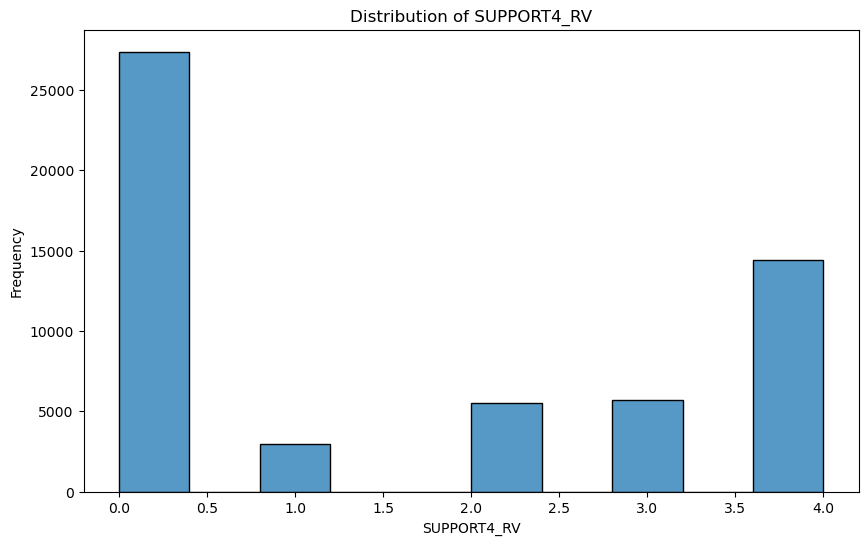

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


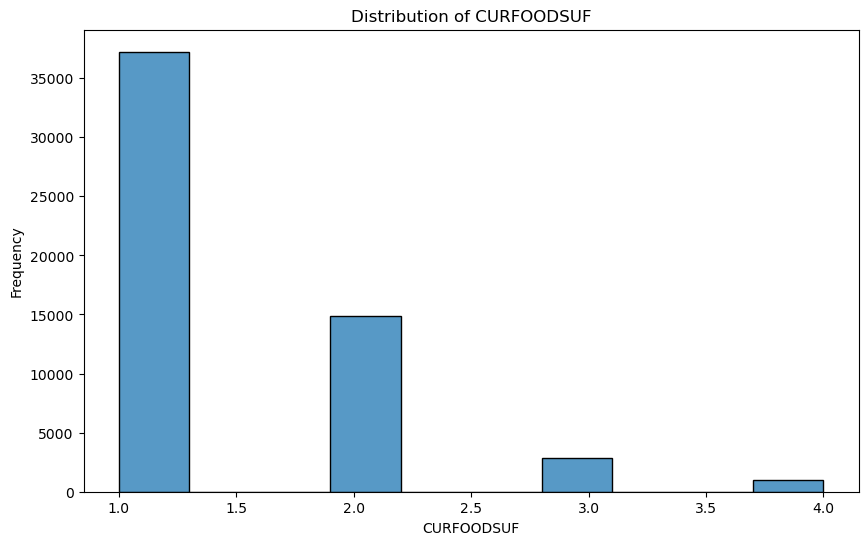

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


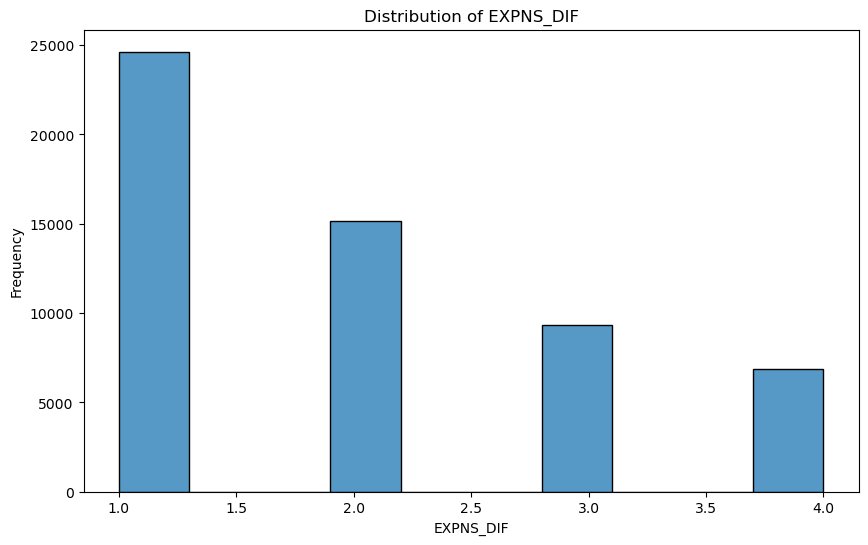

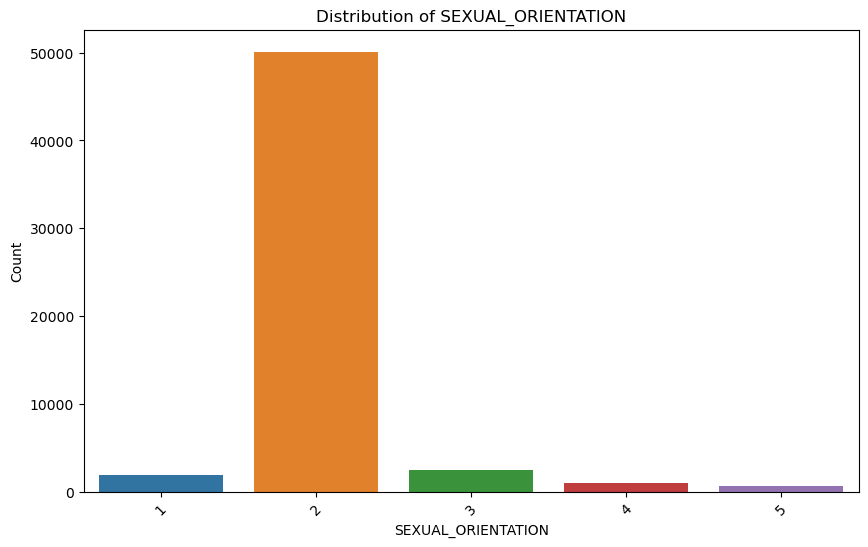

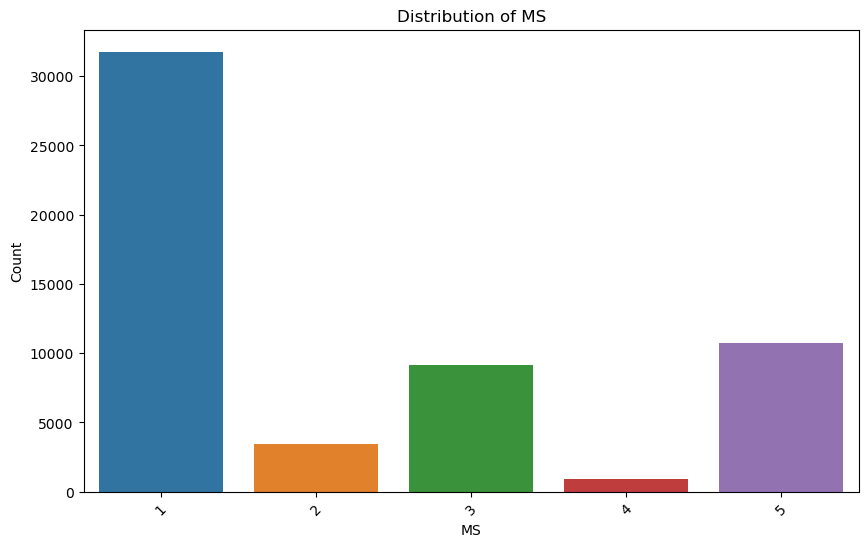

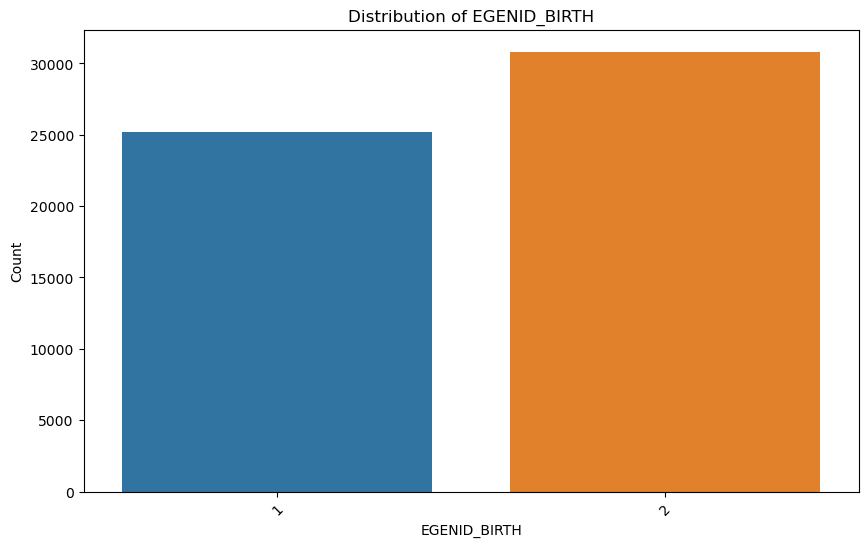

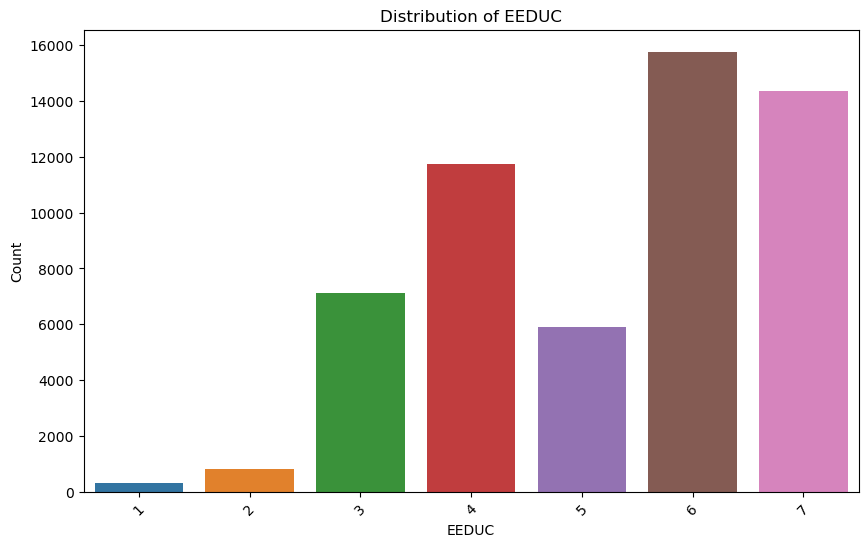

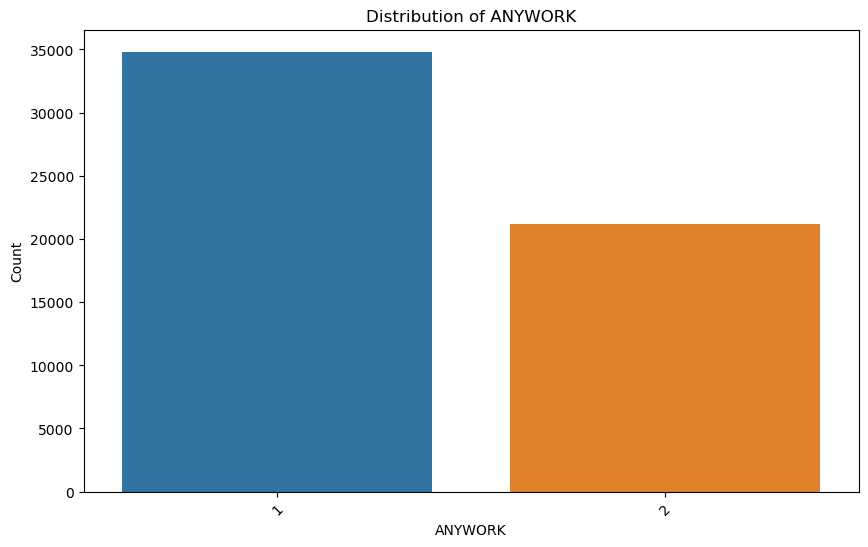

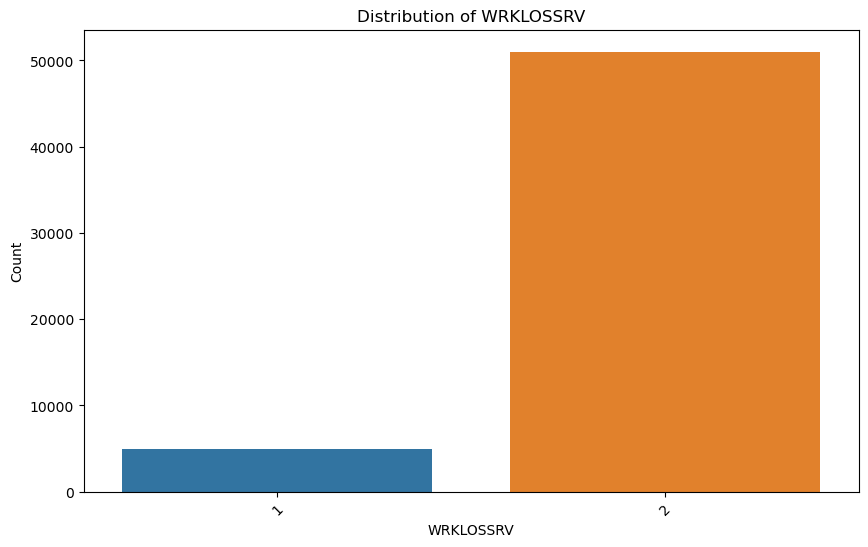

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher la distribution des variables ordinales
def display_ordinal_distribution(df, column_name):
    print(f"Distribution for {column_name}:")
    print(df[column_name].value_counts(normalize=True) * 100)
    print("\n")

# Fonction pour afficher la distribution des variables nominales
def display_nominal_distribution(df, column_name):
    print(f"Distribution for {column_name}:")
    print(df[column_name].value_counts(normalize=True) * 100)
    print("\n")

# Analyse des variables ordinales
ordinal_columns = ['SUPPORT4_RV', 'CURFOODSUF', 'EXPNS_DIF']
for column in ordinal_columns:
    display_ordinal_distribution(DF_HPS_VF_cleaned, column)

# Analyse des variables nominales
nominal_columns = ['SEXUAL_ORIENTATION', 'MS', 'EGENID_BIRTH', 'EEDUC', 'ANYWORK', 'WRKLOSSRV']
for column in nominal_columns:
    display_nominal_distribution(DF_HPS_VF_cleaned, column)

# Création des tableaux croisés dynamiques pour explorer les relations avec la variable cible 'DEPRESSED'
def create_crosstab(df, column_name, target='DEPRESSED'):
    crosstab = pd.crosstab(df[column_name], df[target], normalize='index') * 100
    print(f"Proportions of {target} by {column_name}:")
    print(crosstab)
    print("\n")

# Créer des tableaux croisés dynamiques pour les variables ordinales
for column in ordinal_columns:
    create_crosstab(DF_HPS_VF_cleaned, column)

# Créer des tableaux croisés dynamiques pour les variables nominales
for column in nominal_columns:
    create_crosstab(DF_HPS_VF_cleaned, column)

# Visualisation des distributions

# Histogramme pour les variables ordinales
for column in ordinal_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=DF_HPS_VF_cleaned, x=column, kde=False, bins=10)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Diagramme en barres pour les variables nominales
for column in nominal_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=DF_HPS_VF_cleaned)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Les colonnes avec les corrélations les plus fortes avec DEPRESSED :
SOCIAL2               0.419510
REMEMBERING           0.346500
SOCIAL1               0.326664
EXPNS_DIF             0.309265
CURFOODSUF            0.282874
ENERGY                0.254613
SELFCARE              0.237104
UNDERSTAND            0.194650
PARTINARTS            0.194115
SEEING                0.189679
TBIRTH_YEAR           0.188243
INCOME                0.179329
HSE_TEMP              0.171975
MOBILITY              0.156577
SUPPORT2              0.156576
TENURE                0.156310
MS                    0.148883
SUPPORT4_RV           0.144497
SUPPORT1EXP           0.136856
WRKLOSSRV             0.135983
SUPPORT1              0.131073
SEXUAL_ORIENTATION    0.115154
SUPPORT3              0.114969
EEDUC                 0.105953
LIVENTERTAINMENT      0.086188
HEARING               0.079979
EGENID_BIRTH          0.072624
ARTEXHIBIT            0.058454
MOVIES                0.051784
THHLD_NUMKID          0.030739
TH

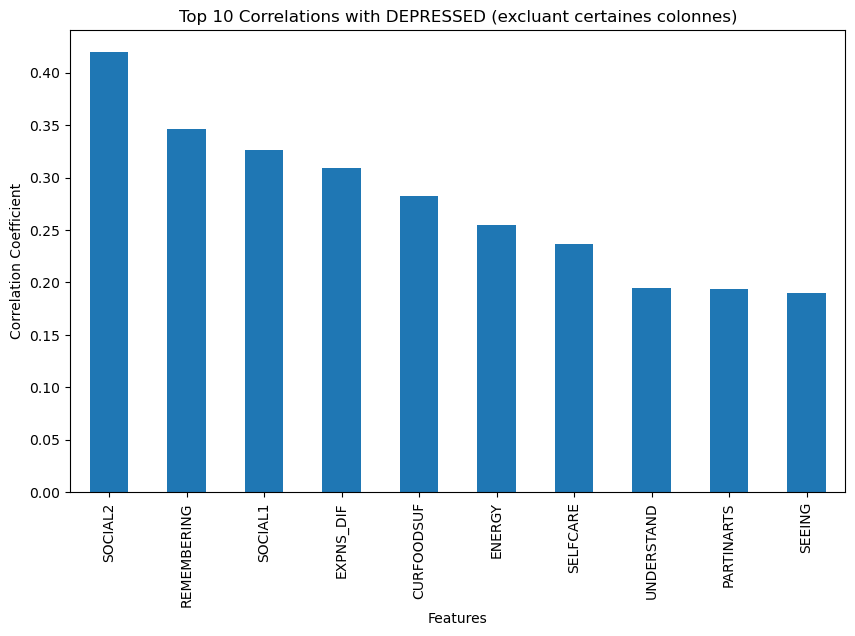

In [31]:
# LISTE DES COLONNES AVEC LES CORRELATIONS LES PLUS IMPORTANTES


# Exclure les colonnes utilisées pour créer 'DEPRESSED'
excluded_columns = ['ANXIOUS', 'WORRY', 'INTEREST', 'DOWN']

# Calculer la matrice de corrélation en excluant les colonnes spécifiques
correlation_matrix = DF_HPS_VF_cleaned.drop(columns=excluded_columns).corr()

# Extraire les corrélations avec la colonne 'DEPRESSED'
correlations_with_depressed = correlation_matrix['DEPRESSED'].drop('DEPRESSED')

# Trier par ordre décroissant de la corrélation absolue
sorted_correlations = correlations_with_depressed.abs().sort_values(ascending=False)

# Afficher les colonnes avec les corrélations les plus fortes
print("Les colonnes avec les corrélations les plus fortes avec DEPRESSED :")
print(sorted_correlations)

# Visualiser les n premières corrélations
n = 10  # Nombre de corrélations à afficher
top_n_correlations = sorted_correlations.head(n)

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
top_n_correlations.plot(kind='bar')
plt.title(f'Top {n} Correlations with DEPRESSED (excluant certaines colonnes)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


Proportions of DEPRESSED by SOCIAL2:
DEPRESSED         0         1
SOCIAL2                      
1          0.235472  0.764528
2          0.443296  0.556704
3          0.746054  0.253946
4          0.910986  0.089014
5          0.945357  0.054643

Proportions of DEPRESSED by REMEMBERING:
DEPRESSED           0         1
REMEMBERING                    
1            0.892475  0.107525
2            0.673538  0.326462
3            0.288732  0.711268
4            0.396552  0.603448

Proportions of DEPRESSED by SOCIAL1:
DEPRESSED         0         1
SOCIAL1                      
1          0.945465  0.054535
2          0.880043  0.119957
3          0.685869  0.314131
4          0.516625  0.483375
5          0.656835  0.343165

Proportions of DEPRESSED by EXPNS_DIF:
DEPRESSED         0         1
EXPNS_DIF                    
1          0.911778  0.088222
2          0.832904  0.167096
3          0.736481  0.263519
4          0.528546  0.471454

Proportions of DEPRESSED by CURFOODSUF:
DEPRESSED

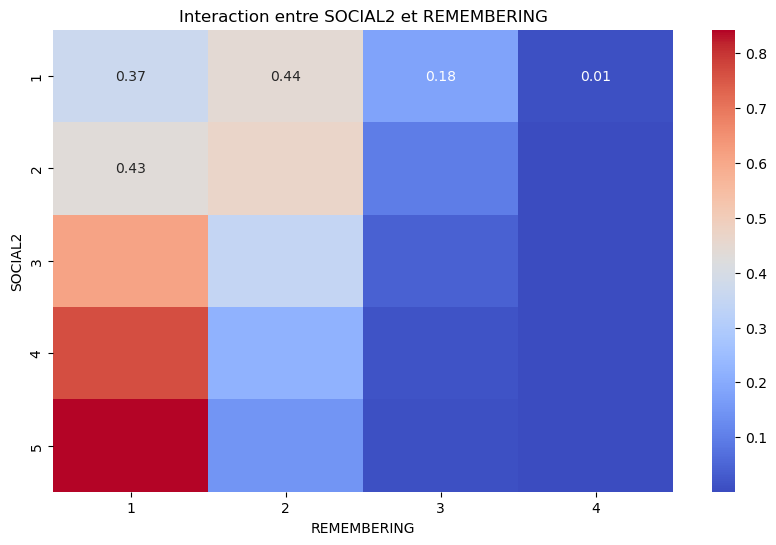

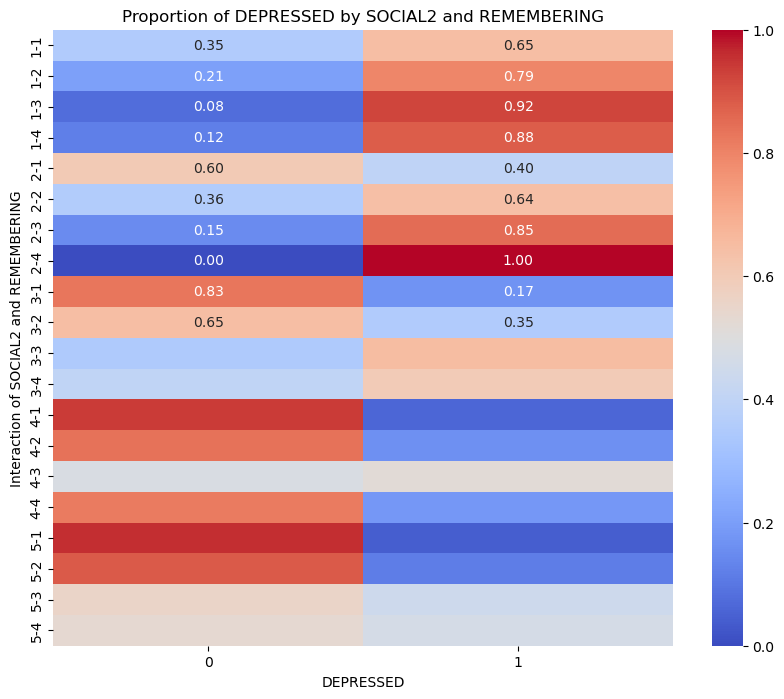

In [33]:
# ANALYSE APPROFONDIE DES VARIABLES AYANT LE PLUS DE CORRELATION AVEC LA COLONNE DEPRESSED


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des principales variables corrélées avec DEPRESSED
main_variables = ['SOCIAL2', 'REMEMBERING', 'SOCIAL1', 'EXPNS_DIF', 'CURFOODSUF']

# Création de tableaux croisés pour les principales variables
for var in main_variables:
    cross_tab = pd.crosstab(DF_HPS_VF_cleaned[var], DF_HPS_VF_cleaned['DEPRESSED'], normalize='index')
    print(f"\nProportions of DEPRESSED by {var}:")
    print(cross_tab)

# Visualisation des interactions entre SOCIAL2 et REMEMBERING
interaction = pd.crosstab(DF_HPS_VF_cleaned['SOCIAL2'], DF_HPS_VF_cleaned['REMEMBERING'], normalize='index')

# Heatmap pour visualiser l'interaction entre SOCIAL2 et REMEMBERING
plt.figure(figsize=(10, 6))
sns.heatmap(interaction, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Interaction entre SOCIAL2 et REMEMBERING')
plt.xlabel('REMEMBERING')
plt.ylabel('SOCIAL2')
plt.show()

# Examining the interaction effect on DEPRESSED
interaction_depressed = pd.crosstab([DF_HPS_VF_cleaned['SOCIAL2'], DF_HPS_VF_cleaned['REMEMBERING']], DF_HPS_VF_cleaned['DEPRESSED'], normalize='index')

# Heatmap pour visualiser l'effet de l'interaction sur DEPRESSED
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_depressed, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Proportion of DEPRESSED by SOCIAL2 and REMEMBERING')
plt.xlabel('DEPRESSED')
plt.ylabel('Interaction of SOCIAL2 and REMEMBERING')
plt.show()


In [ ]:







# ------------------------------------------------------- MACHINE LEARNING-------------------------------------------------------------------







In [54]:
# ENCODAGE DES VARIABLES


# Colonnes Numériques Catégorielles Ordinales
ordinal_columns = [
    'SUPPORT4_RV', 'EXPNS_DIF', 'CURFOODSUF', 'EEDUC', 'INCOME', 'TENURE', 'HSE_TEMP',
    'ENERGY', 'SUPPORT1EXP', 'SUPPORT3', 'SUPPORT2', 'SUPPORT1', 'SOCIAL1', 'SOCIAL2',
    'HEARING', 'SELFCARE', 'REMEMBERING', 'MOBILITY', 'UNDERSTAND', 'SEEING', 'PARTINARTS'
]

# Colonnes Numériques Catégorielles Nominales
nominal_columns = [
    'SEXUAL_ORIENTATION', 'MS', 'EGENID_BIRTH', 'ANYWORK', 'WRKLOSSRV', 'CREATEART',
    'ARTEXHIBIT', 'MOVIES', 'LIVENTERTAINMENT'
]

# Encodage des colonnes nominales
DF_HPS_VF_cleaned_encoded = pd.get_dummies(DF_HPS_VF_cleaned, columns=nominal_columns, drop_first=True)

# Affichage des premières lignes du DataFrame encodé
print(DF_HPS_VF_cleaned_encoded.head())

# Sauvegarde du DataFrame encodé dans un nouveau fichier CSV
output_path_encoded = '/Users/ikram/Documents/FinaleProject//DF_HPS_VF_cleaned_encoded.csv'
DF_HPS_VF_cleaned_encoded.to_csv(output_path_encoded, index=False)
print(f"Le DataFrame encodé a été enregistré avec succès dans {output_path_encoded}")

   TBIRTH_YEAR  EEDUC  THHLD_NUMPER  THHLD_NUMKID INCOME CURFOODSUF EXPNS_DIF  \
0         1998      7             2             0      6          1         1   
1         1962      6             1             0      6          2         1   
2         1951      5             1             0      3          1         1   
3         1975      5             2             1      3          2         3   
6         1945      2             1             0      1          1         3   

  TENURE HSE_TEMP ENERGY SUPPORT1EXP SUPPORT3 SUPPORT4_RV SUPPORT2 SUPPORT1  \
0      2        4      4           4        1           1        1        4   
1      2        4      4           3        2           1        2        2   
2      2        4      4           4        1           0        2        4   
3      1        2      3           4        3           0        2        3   
6      1        4      4           4        1           0        2        4   

  SOCIAL1 SOCIAL2 HEARING SELFCARE REM

In [64]:
# Afficher les types de données après encodage
print(DF_HPS_VF_cleaned_encoded.dtypes)


TBIRTH_YEAR              int64
EEDUC                    int64
THHLD_NUMPER             int64
THHLD_NUMKID             int64
INCOME                  object
CURFOODSUF              object
EXPNS_DIF               object
TENURE                  object
HSE_TEMP                object
ENERGY                  object
SUPPORT1EXP             object
SUPPORT3                object
SUPPORT4_RV             object
SUPPORT2                object
SUPPORT1                object
SOCIAL1                 object
SOCIAL2                 object
HEARING                 object
SELFCARE                object
REMEMBERING             object
MOBILITY                object
UNDERSTAND              object
SEEING                  object
DOWN                    object
WORRY                   object
INTEREST                object
ANXIOUS                 object
PARTINARTS              object
DEPRESSED                int64
SEXUAL_ORIENTATION_2      bool
SEXUAL_ORIENTATION_3      bool
SEXUAL_ORIENTATION_4      bool
SEXUAL_O

In [72]:
# Liste des colonnes catégorielles à convertir
categorical_columns = ['INCOME', 'CURFOODSUF', 'EXPNS_DIF', 'TENURE', 'HSE_TEMP', 'ENERGY',
                       'SUPPORT1EXP', 'SUPPORT3', 'SUPPORT4_RV', 'SUPPORT2', 'SUPPORT1',
                       'SOCIAL1', 'SOCIAL2', 'HEARING', 'SELFCARE', 'REMEMBERING',
                       'MOBILITY', 'UNDERSTAND', 'SEEING', 'PARTINARTS']

# Conversion des colonnes catégorielles en type 'category'
for col in categorical_columns:
    DF_HPS_VF_cleaned_encoded[col] = DF_HPS_VF_cleaned_encoded[col].astype('category')

# Réaffichage des types de données pour vérification
print(DF_HPS_VF_cleaned_encoded.dtypes)



TBIRTH_YEAR                int64
EEDUC                      int64
THHLD_NUMPER               int64
THHLD_NUMKID               int64
INCOME                  category
CURFOODSUF              category
EXPNS_DIF               category
TENURE                  category
HSE_TEMP                category
ENERGY                  category
SUPPORT1EXP             category
SUPPORT3                category
SUPPORT4_RV             category
SUPPORT2                category
SUPPORT1                category
SOCIAL1                 category
SOCIAL2                 category
HEARING                 category
SELFCARE                category
REMEMBERING             category
MOBILITY                category
UNDERSTAND              category
SEEING                  category
DOWN                       int64
WORRY                      int64
INTEREST                   int64
ANXIOUS                    int64
PARTINARTS              category
DEPRESSED                  int64
SEXUAL_ORIENTATION_2        bool
SEXUAL_ORI

In [80]:
!pip install imbalanced-learn
!pip install xgboost

[[13193   508]
 [ 1906  1188]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     13701
           1       0.70      0.38      0.50      3094

    accuracy                           0.86     16795
   macro avg       0.79      0.67      0.71     16795
weighted avg       0.84      0.86      0.84     16795



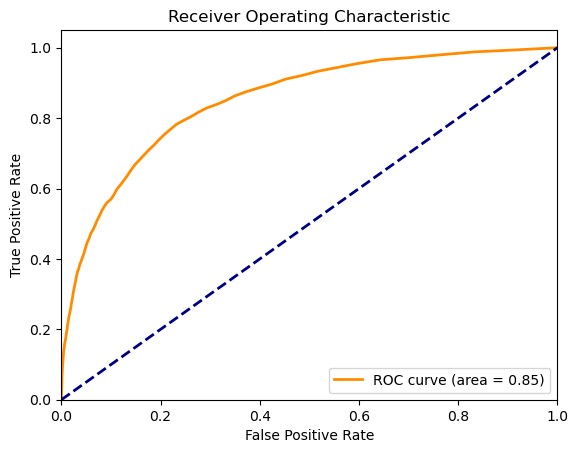

Le modèle a été sauvegardé avec succès.


In [56]:
#UTILISATION DU MODELE RANDOM FOREST

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pickle

# PREPARATION ET ENTRAINEMENT DU MODELE RANDOM FOREST

# Séparation des features et de la target
X = DF_HPS_VF_cleaned_encoded.drop(['DEPRESSED', 'DOWN', 'WORRY', 'INTEREST', 'ANXIOUS'], axis=1)
y = DF_HPS_VF_cleaned_encoded['DEPRESSED']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluation du modèle
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Affichage de la courbe ROC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Sauvegarde du modèle entraîné
import pickle
with open('/Users/ikram/Documents/FinaleProject/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Le modèle a été sauvegardé avec succès.")



Distribution des classes après SMOTE :
DEPRESSED
0    31880
1    31880
Name: count, dtype: int64
[[13013   688]
 [ 1789  1305]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13701
           1       0.65      0.42      0.51      3094

    accuracy                           0.85     16795
   macro avg       0.77      0.69      0.71     16795
weighted avg       0.84      0.85      0.84     16795



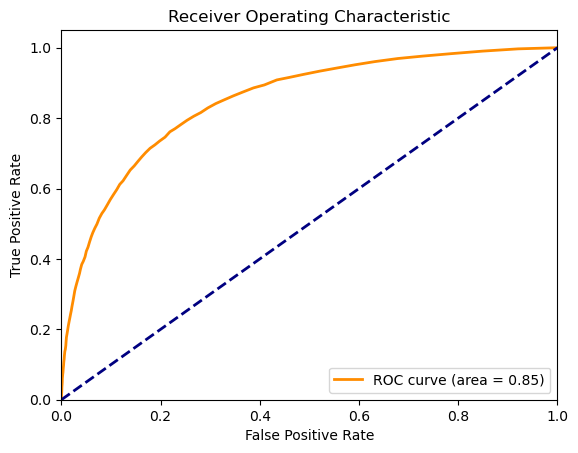

Le modèle a été sauvegardé avec succès dans /Users/ikram/Documents/FinaleProject/random_forest_model2.pkl


In [39]:
# AMELIORATION DU MODELE RANDOM FOREST: EQUILIBRAGE DES SMOTE


import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pickle


# Séparer les features et la target, en excluant les colonnes ayant servi à créer la target
X = DF_HPS_VF_cleaned_encoded.drop(['DEPRESSED', 'DOWN', 'WORRY', 'INTEREST', 'ANXIOUS'], axis=1)
y = DF_HPS_VF_cleaned_encoded['DEPRESSED']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Afficher la distribution des classes après SMOTE
print("Distribution des classes après SMOTE :")
print(y_train_res.value_counts())

# Entraîner un modèle de base pour comparer
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred = rf_model.predict(X_test)

# Évaluation du modèle de base
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Tracer la courbe ROC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Sauvegarder le modèle entraîné
model_path = '/Users/ikram/Documents/FinaleProject/random_forest_model2.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(rf_model, file)
print(f"Le modèle a été sauvegardé avec succès dans {model_path}")

In [82]:
# EVALUATION DU MODELE RANDOM FOREST OPTIMISE

# Ajuster le modèle RandomForestClassifier optimisé
rf_model_optimized.fit(X_train_res, y_train_res)

# Prédictions avec le modèle Random Forest optimisé
y_pred_best_rf = rf_model_optimized.predict(X_test)

# Évaluation du modèle Random Forest optimisé
print("Évaluation du modèle Random Forest optimisé :")
print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

# Tracer la courbe ROC pour le modèle Random Forest optimisé
y_pred_prob_best_rf = rf_model_optimized.predict_proba(X_test)[:, 1]
fpr_best_rf, tpr_best_rf, thresholds_best_rf = roc_curve(y_test, y_pred_prob_best_rf)
roc_auc_best_rf = auc(fpr_best_rf, tpr_best_rf)

plt.figure()
plt.plot(fpr_best_rf, tpr_best_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()


NameError: name 'rf_model_optimized' is not defined